### Long covid data exploration

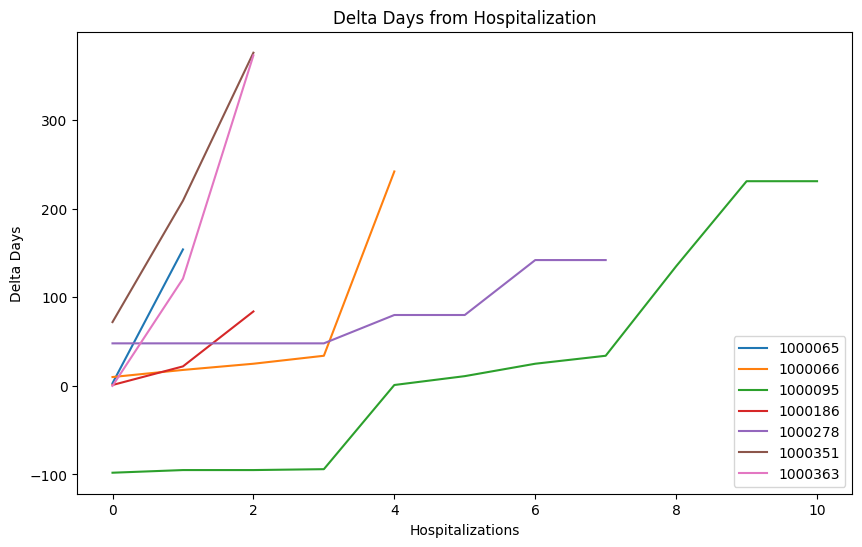

In [1]:
import matplotlib.pyplot as plt

# Patient data
patient_data = [
    (1000065, 3),
    (1000065, 154),
    (1000066, 10),
    (1000066, 18),
    (1000066, 25),
    (1000066, 34),
    (1000066, 242),
    (1000095, -98),
    (1000095, -95),
    (1000095, -95),
    (1000095, -94),
    (1000095, 1),
    (1000095, 11),
    (1000095, 25),
    (1000095, 34),
    (1000095, 135),
    (1000095, 231),
    (1000095, 231),
    (1000186, 1),
    (1000186, 22),
    (1000186, 84),
    (1000278, 48),
    (1000278, 48),
    (1000278, 48),
    (1000278, 48),
    (1000278, 80),
    (1000278, 80),
    (1000278, 142),
    (1000278, 142),
    (1000351, 72),
    (1000351, 209),
    (1000351, 376),
    (1000363, 0),
    (1000363, 121),
    (1000363, 373)
]

# Separate patient IDs and delta days
patient_ids = [p[0] for p in patient_data]
delta_days = [p[1] for p in patient_data]

# Create a dictionary to store the delta days for each patient
patient_dict = {}
for patient_id, delta_day in patient_data:
    if patient_id in patient_dict:
        patient_dict[patient_id].append(delta_day)
    else:
        patient_dict[patient_id] = [delta_day]

# Plotting
plt.figure(figsize=(10, 6))
for patient_id, delta_days in patient_dict.items():
    plt.plot(range(len(delta_days)), delta_days, label=str(patient_id))
plt.xlabel('Hospitalizations')
plt.ylabel('Delta Days')
plt.title('Delta Days from Hospitalization')
plt.legend()
plt.show()

In [3]:
# Define the data
data = [
    (1000065, 3),
    (1000065, 154),
    (1000066, 10),
    (1000066, 18),
    (1000066, 25),
    (1000066, 34),
    (1000066, 242),
    (1000095, -98),
    (1000095, -95),
    (1000095, -95),
    (1000095, -94),
    (1000095, 1),
    (1000095, 11),
    (1000095, 25),
    (1000095, 34),
    (1000095, 135),
    (1000095, 231),
    (1000095, 231),
    (1000186, 1),
    (1000186, 22),
    (1000186, 84),
    (1000278, 48),
    (1000278, 48),
    (1000278, 48),
    (1000278, 48),
    (1000278, 80),
    (1000278, 80),
    (1000278, 142),
    (1000278, 142),
    (1000351, 72),
    (1000351, 209),
    (1000351, 376),
    (1000363, 0),
    (1000363, 121),
    (1000363, 373)
]

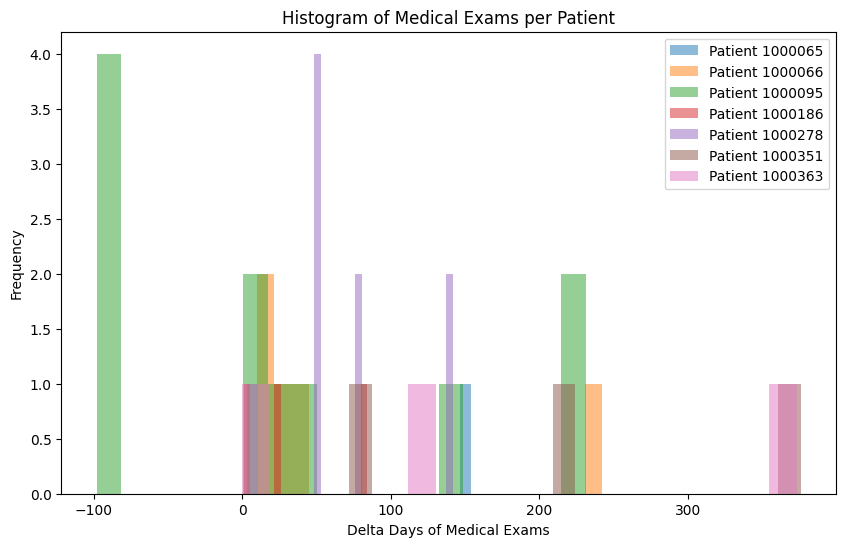

In [4]:
# Create a dictionary to store the number of medical exams per patient
histogram = {}
for patient_id, delta_days in data:
    if patient_id in histogram:
        histogram[patient_id].append(delta_days)
    else:
        histogram[patient_id] = [delta_days]

# Create a histogram plot for each patient
plt.figure(figsize=(10, 6))
for patient_id, delta_days in histogram.items():
    plt.hist(delta_days, bins=20, alpha=0.5, label=f"Patient {patient_id}")

# Set plot labels and title
plt.xlabel('Delta Days of Medical Exams')
plt.ylabel('Frequency')
plt.title('Histogram of Medical Exams per Patient')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [5]:
import numpy as np

def calculate_iqr(data):
    # Calculate the first quartile (Q1)
    q1 = np.percentile(data, 25)
    
    # Calculate the third quartile (Q3)
    q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower bound for outliers
    lower_bound = q1 - 1.5 * iqr
    
    # Calculate the upper bound for outliers
    upper_bound = q3 + 1.5 * iqr
    
    return q1, q3, iqr, lower_bound, upper_bound

# Example usage
data = [3, 154, 10, 18, 25, 34, 242, -98, -95, -95, -94, 1, 11, 25, 34, 135, 231, 231, 1, 22, 84, 48, 48, 48, 48, 80, 80, 142, 142, 72, 209, 376, 0, 121, 373]
q1, q3, iqr, lower_bound, upper_bound = calculate_iqr(data)
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Q1: 10.5
Q3: 138.5
IQR: 128.0
Lower Bound: -181.5
Upper Bound: 330.5


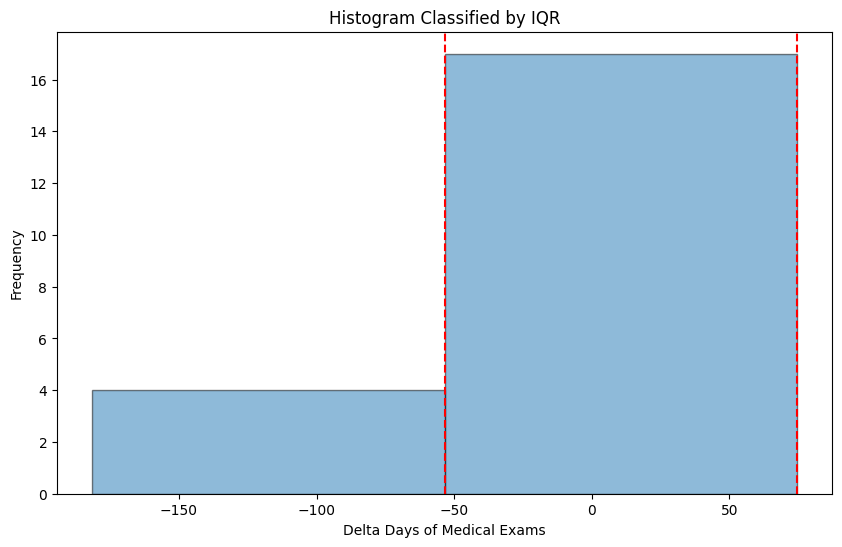

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_by_iqr(data):
    # Calculate quartiles and IQR
    q1, q3, iqr, lower_bound, upper_bound = calculate_iqr(data)
    
    # Create bins for each IQR range
    num_bins = int((q3 - q1) / iqr) + 1
    bins = [lower_bound + i * iqr for i in range(num_bins + 1)]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.5)
    
    # Add labels and title
    plt.xlabel('Delta Days of Medical Exams')
    plt.ylabel('Frequency')
    plt.title('Histogram Classified by IQR')
    
    # Add vertical lines for IQR ranges
    for i in range(num_bins):
        plt.axvline(bins[i+1], color='r', linestyle='--')
    
    # Show the plot
    plt.show()

# Example usage
data = [3, 154, 10, 18, 25, 34, 242, -98, -95, -95, -94, 1, 11, 25, 34, 135, 231, 231, 1, 22, 84, 48, 48, 48, 48, 80, 80, 142, 142, 72, 209, 376, 0, 121, 373]
plot_histogram_by_iqr(data)

/home/jagh/anaconda3/envs/ecgnet/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


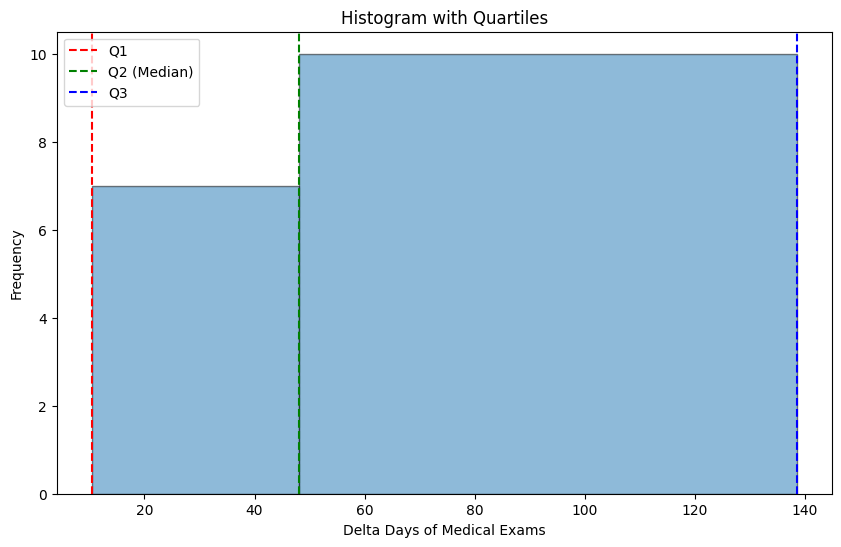

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_with_quartiles(data):
    # Calculate quartiles
    q1, q2, q3, q4 = np.percentile(data, [5, 50, 75, 90])
    
    # Create bins for each quartile
    bins = [float('-inf'), q1, q2, q3, float('inf')]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.5)
    
    # Add labels and title
    plt.xlabel('Delta Days of Medical Exams')
    plt.ylabel('Frequency')
    plt.title('Histogram with Quartiles')
    
    # Add vertical lines for quartiles
    plt.axvline(q1, color='r', linestyle='--', label='Q1')
    plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
    plt.axvline(q3, color='b', linestyle='--', label='Q3')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

# Example usage
data = [3, 154, 10, 18, 25, 34, 242, -98, -95, -95, -94, 1, 11, 25, 34, 135, 231, 231, 1, 22, 84, 48, 48, 48, 48, 80, 80, 142, 142, 72, 209, 376, 0, 121, 373]
plot_histogram_with_quartiles(data)

/home/jagh/anaconda3/envs/ecgnet/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


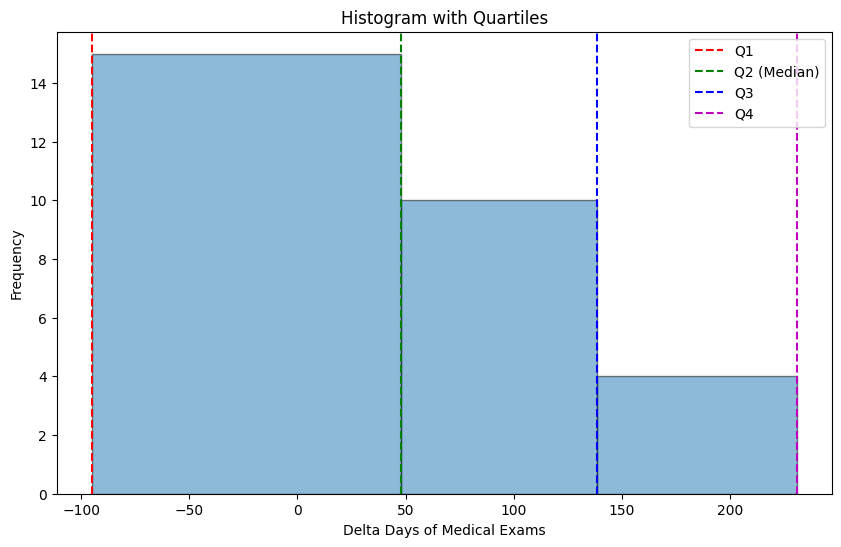

In [8]:
def plot_histogram_with_quartiles(data):
    # Calculate quartiles
    q1, q2, q3, q4 = np.percentile(data, [5, 50, 75, 90])
    
    # Create bins for each quartile
    bins = [float('-inf'), q1, q2, q3, q4, float('inf')]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.5)
    
    # Add labels and title
    plt.xlabel('Delta Days of Medical Exams')
    plt.ylabel('Frequency')
    plt.title('Histogram with Quartiles')
    
    # Add vertical lines for quartiles
    plt.axvline(q1, color='r', linestyle='--', label='Q1')
    plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
    plt.axvline(q3, color='b', linestyle='--', label='Q3')
    plt.axvline(q4, color='m', linestyle='--', label='Q4')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

# Example usage
data = [3, 154, 10, 18, 25, 34, 242, -98, -95, -95, -94, 1, 11, 25, 34, 135, 231, 231, 1, 22, 84, 48, 48, 48, 48, 80, 80, 142, 142, 72, 209, 376, 0, 121, 373]
plot_histogram_with_quartiles(data)

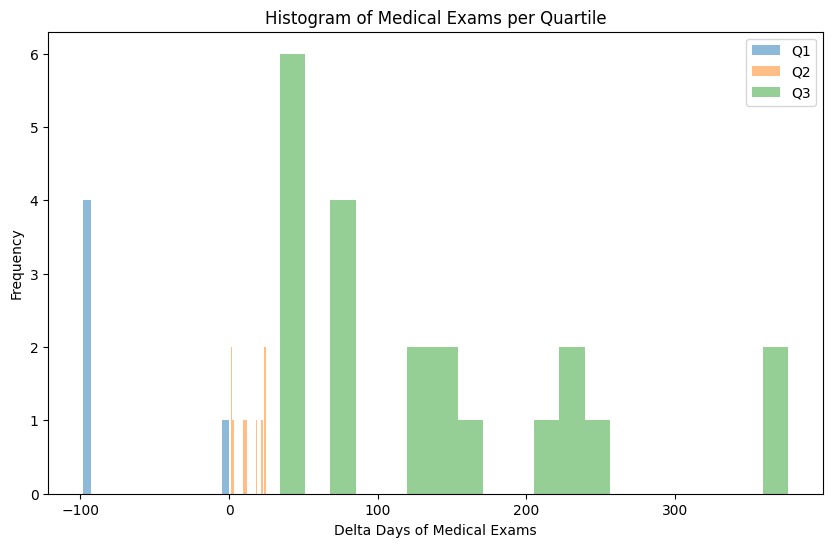

In [14]:
def plot_histogram_by_quartile(data):
    # Calculate quartiles
    q1, q2, q3 = np.percentile(data, [12, 40, 95])

    # Create a dictionary to store the number of medical exams per quartile
    histogram = {
        'Q1': [],
        'Q2': [],
        'Q3': []
    }
    
    # Categorize the delta days into the respective quartile
    for delta_days in data:
        if delta_days <= q1:
            histogram['Q1'].append(delta_days)
        elif delta_days <= q2:
            histogram['Q2'].append(delta_days)
        else:
            histogram['Q3'].append(delta_days)

    # Create a histogram plot for each quartile
    plt.figure(figsize=(10, 6))
    for quartile, delta_days in histogram.items():
        plt.hist(delta_days, bins=20, alpha=0.5, label=quartile)

    # Set plot labels and title
    plt.xlabel('Delta Days of Medical Exams')
    plt.ylabel('Frequency')
    plt.title('Histogram of Medical Exams per Quartile')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
data = [3, 154, 10, 18, 25, 34, 242, -98, -95, -95, -94, 1, 11, 25, 34, 135, 231, 231, 1, 22, 84, 48, 48, 48, 48, 80, 80, 142, 142, 72, 209, 376, 0, 121, 373]
plot_histogram_by_quartile(data)

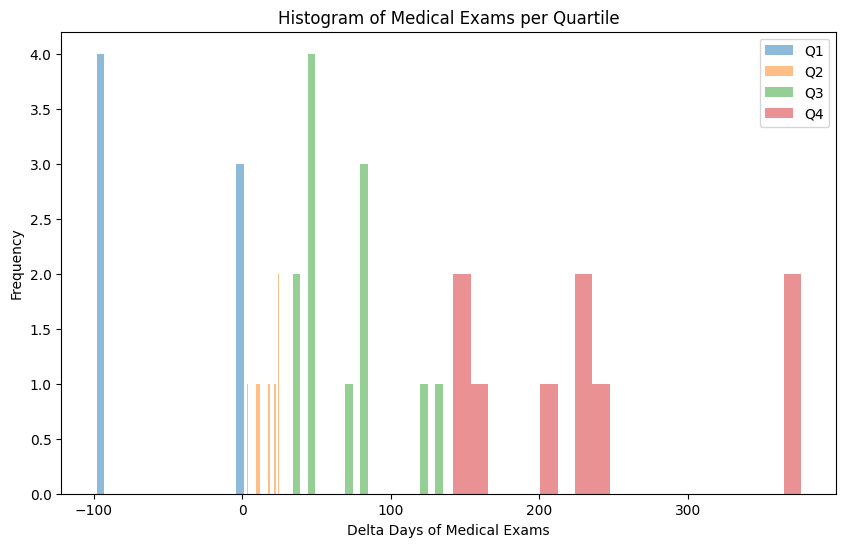

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_by_quartile(data):
    # Calculate quartiles
    q1, q2, q3, q4 = np.percentile(data, [15, 40, 75, 90])

    # Create a dictionary to store the number of medical exams per quartile
    histogram = {
        'Q1': [],
        'Q2': [],
        'Q3': [],
        'Q4': []
    }
    
    # Categorize the delta days into the respective quartile
    for delta_days in data:
        if delta_days <= q1:
            histogram['Q1'].append(delta_days)
        elif delta_days <= q2:
            histogram['Q2'].append(delta_days)
        elif delta_days <= q3:
            histogram['Q3'].append(delta_days)
        else:
            histogram['Q4'].append(delta_days)

    # Create a histogram plot for each quartile
    plt.figure(figsize=(10, 6))
    for quartile, delta_days in histogram.items():
        plt.hist(delta_days, bins=20, alpha=0.5, label=quartile)

    # Set plot labels and title
    plt.xlabel('Delta Days of Medical Exams')
    plt.ylabel('Frequency')
    plt.title('Histogram of Medical Exams per Quartile')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
data = [3, 154, 10, 18, 25, 34, 242, -98, -95, -95, -94, 1, 11, 25, 34, 135, 231, 231, 1, 22, 84, 48, 48, 48, 48, 80, 80, 142, 142, 72, 209, 376, 0, 121, 373]


In [47]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np


def read_csv(file_path, sep=','):
    """
    Reads the CSV file into a DataFrame.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: The DataFrame containing the data from the CSV file.
    """
    return pd.read_csv(file_path, sep=sep)


def plot_histogram_by_quartile_V1(data):
    # Calculate quartiles
    q1, q2, q3, q4 = np.percentile(data, [15, 40, 75, 90])

    # Create a dictionary to store the number of medical exams per quartile
    histogram = {
        'Q1': [],
        'Q2': [],
        'Q3': [],
        'Q4': []
    }
    
    # Categorize the delta days into the respective quartile
    for delta_days in data:
        if delta_days <= q1:
            histogram['Q1'].append(delta_days)
        elif delta_days <= q2:
            histogram['Q2'].append(delta_days)
        elif delta_days <= q3:
            histogram['Q3'].append(delta_days)
        else:
            histogram['Q4'].append(delta_days)

    # Create a histogram plot for each quartile
    plt.figure(figsize=(10, 6))
    for quartile, delta_days in histogram.items():
        plt.hist(delta_days, bins=20, alpha=0.5, label=quartile)

    # Set plot labels and title
    plt.xlabel('Delta Days of Medical Imaging Exams')
    plt.ylabel('Frequency')
    plt.title('Histogram of Medical Imaging Exams per Quartile')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


def plot_histogram_by_quartile_V2(data, exam_type='CTs and X-rays', N='86'):
    # Fixed quartile ranges
    quartile_ranges = {
        'Q1': [-250, -1],
        'Q2': [0, 60],
        'Q3': [61, 149],
        'Q4': [150, 319]
    }

    # Create a dictionary to store the number of medical exams per quartile
    histogram = {
        'Q1': [],
        'Q2': [],
        'Q3': [],
        'Q4': []
    }
    
    # Categorize the delta days into the respective quartile
    for delta_days in data:
        for quartile, (lower_bound, upper_bound) in quartile_ranges.items():
            if lower_bound <= delta_days <= upper_bound:
                histogram[quartile].append(delta_days)
                break

    # Create a histogram plot for each quartile
    plt.figure(figsize=(10, 6))
    for quartile, delta_days in histogram.items():
        plt.hist(delta_days, bins=20, alpha=0.5, label=quartile)

    # Set plot labels and title
    plt.xlabel('Delta Days of ' + exam_type)
    plt.ylabel('Frequency')
    plt.title('Histogram of Long COVID Patients (N=' + N + ')')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()



def plot_histogram_by_quartile(data, exam_type='CTs and X-rays', N='86'):
    # Fixed quartile ranges
    quartile_ranges = {
        'Q1': [-400, -1],
        'Q2': [0, 60],
        'Q3': [61, 149],
        'Q4': [150, 500]
    }

    # Create a dictionary to store the number of medical exams per quartile
    histogram = {
        'Q1': [],
        'Q2': [],
        'Q3': [],
        'Q4': []
    }
    
    # Categorize the delta days into the respective quartile
    for delta_days in data:
        for quartile, (lower_bound, upper_bound) in quartile_ranges.items():
            if lower_bound <= delta_days <= upper_bound:
                histogram[quartile].append(delta_days)
                break

    # Calculate the number of samples in each quartile
    sample_counts = {quartile: len(delta_days) for quartile, delta_days in histogram.items()}

    ## Get the total number of samples
    total_number_of_samples = sum(sample_counts.values())
    print('total_number_of_samples', total_number_of_samples)

    # Create a histogram plot for each quartile
    plt.figure(figsize=(10, 6))
    for quartile, delta_days in histogram.items():
        plt.hist(delta_days, bins=20, alpha=0.5, label=f"{quartile} (n={sample_counts[quartile]})")

    # Set plot labels and title
    plt.xlabel('Delta Days of ' + exam_type)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of potential long COVID patients (N={N})')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

## Plotting the histogram for G1 and G2

sample_counts {'Q1': 139, 'Q2': 407, 'Q3': 104, 'Q4': 204}


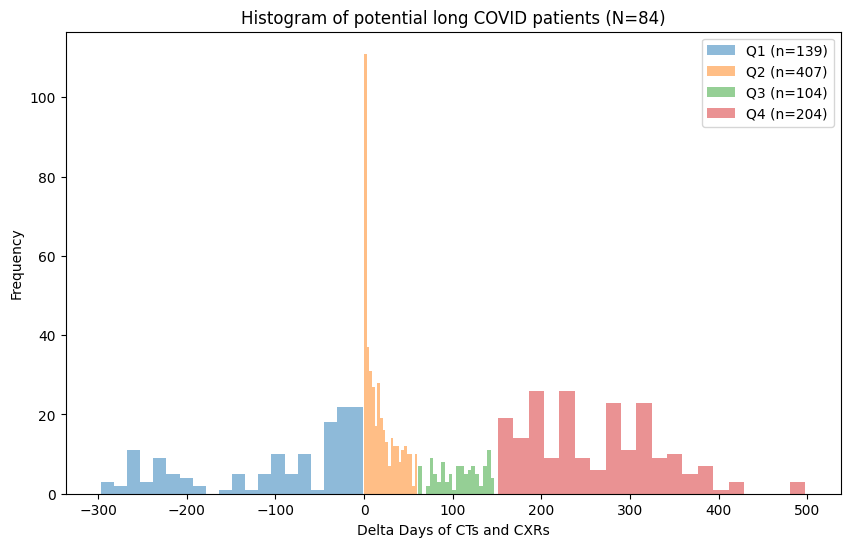

sample_counts {'Q1': 48, 'Q2': 121, 'Q3': 49, 'Q4': 106}


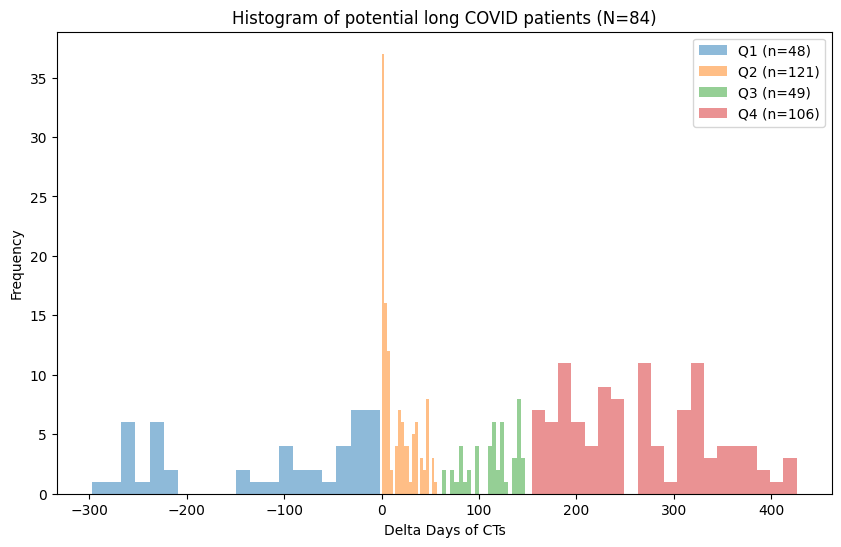

sample_counts {'Q1': 91, 'Q2': 286, 'Q3': 55, 'Q4': 98}


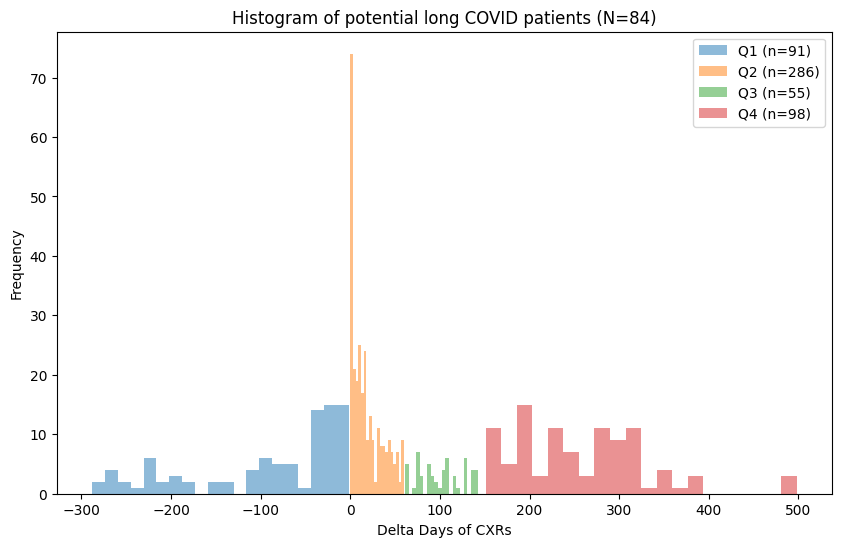

In [48]:
## Plotting the histogram for G1 and G2

dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/'
filename = os.path.join(dir_path, 'complete_list_long_covid_patients_ris_information_and_IDSC_keys.csv')

## Read the CSV file into a DataFrame
df = read_csv(filename)
# print(df.head())

## Set number of patients in the DataFrame
N='84'


#############################################
## Step 1: Plot histogram for CTs and CXRs ##
#############################################

## Extract the delta days from the DataFrame
delta_days = df['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days, exam_type='CTs and CXRs', N=N)



#############################################
## Step 2: Plot histogram for CTs          ##
#############################################

## Filter the patients with 'ris_examination_type' == 'CTA, CTTH'
df_CTs = df[df['ris_examination_type'].isin(['CTA', 'CTTH'])]

## Extract the delta days from the DataFrame 'df_CTs'
delta_days_CTs = df_CTs['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days_CTs, exam_type='CTs', N=N)



#############################################
## Step 3: Plot histogram for CXRs         ##
#############################################

## Filter the patients with 'ris_examination_type' == 'TH'
df_CXRs = df[df['ris_examination_type'].isin(['TH'])]

## Extract the delta days from the DataFrame 'df_CTs'
delta_days_CXRs = df_CXRs['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days_CXRs, exam_type='CXRs', N=N)

## Plotting the histogram for G1

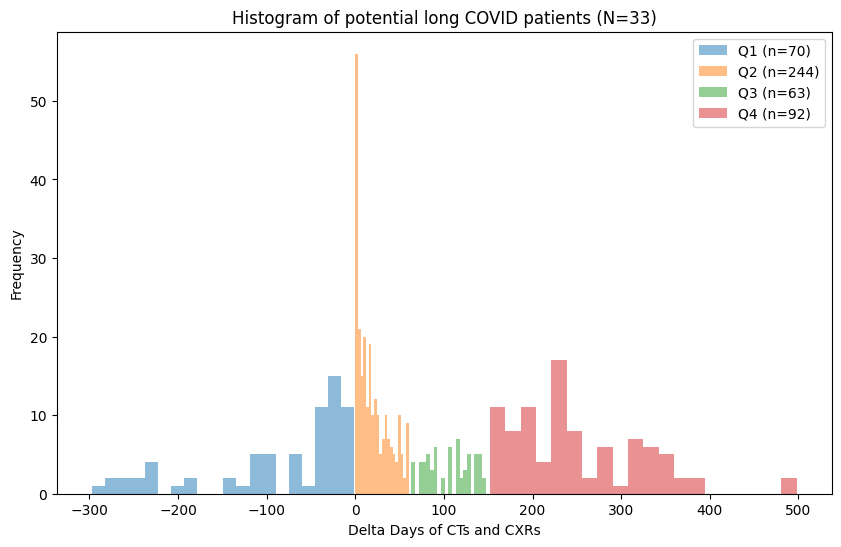

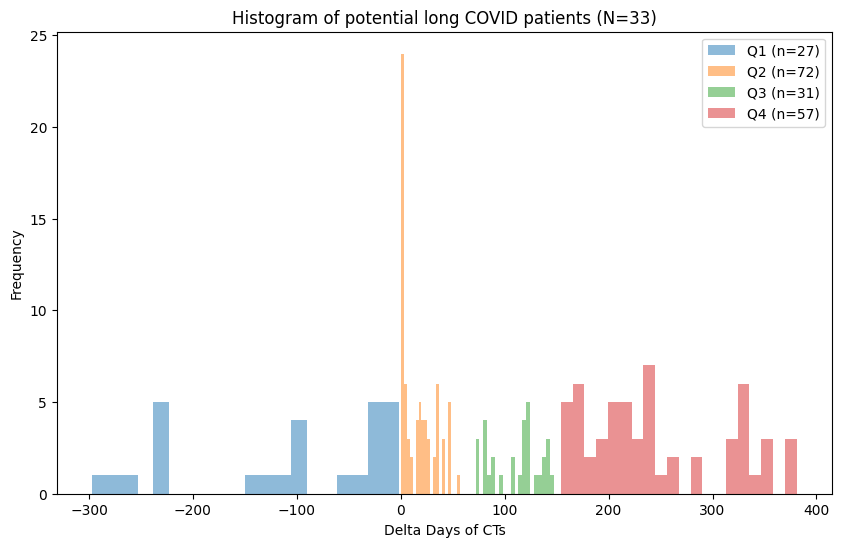

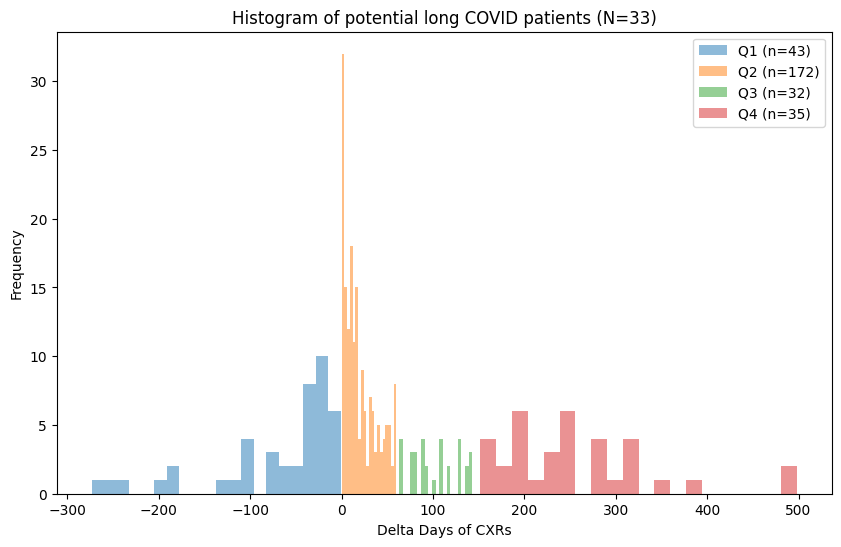

In [44]:
## Plotting the histogram for G1

dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/'
filename = os.path.join(dir_path, 'complete_list_long_covid_patients_Group1.csv')

## Read the CSV file into a DataFrame
df = read_csv(filename)
# print(df.head())

## Set number of patients in the DataFrame
N='33'


#############################################
## Step 1: Plot histogram for CTs and CXRs ##
#############################################

## Extract the delta days from the DataFrame
delta_days = df['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days, exam_type='CTs and CXRs', N=N)



#############################################
## Step 2: Plot histogram for CTs          ##
#############################################

## Filter the patients with 'ris_examination_type' == 'CTA, CTTH'
df_CTs = df[df['ris_examination_type'].isin(['CTA', 'CTTH'])]

## Extract the delta days from the DataFrame 'df_CTs'
delta_days_CTs = df_CTs['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days_CTs, exam_type='CTs', N=N)



#############################################
## Step 3: Plot histogram for CXRs         ##
#############################################

## Filter the patients with 'ris_examination_type' == 'TH'
df_CXRs = df[df['ris_examination_type'].isin(['TH'])]

## Extract the delta days from the DataFrame 'df_CTs'
delta_days_CXRs = df_CXRs['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days_CXRs, exam_type='CXRs', N=N)

## Plotting the histogram for G2

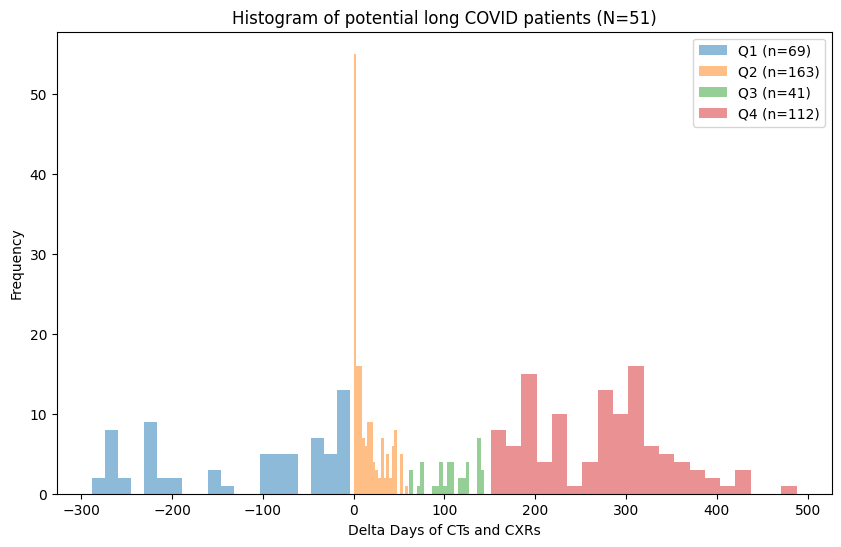

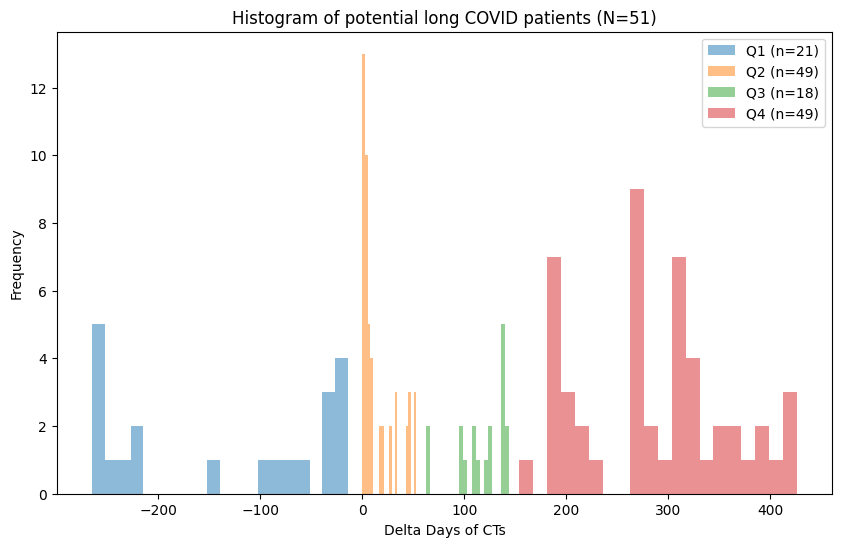

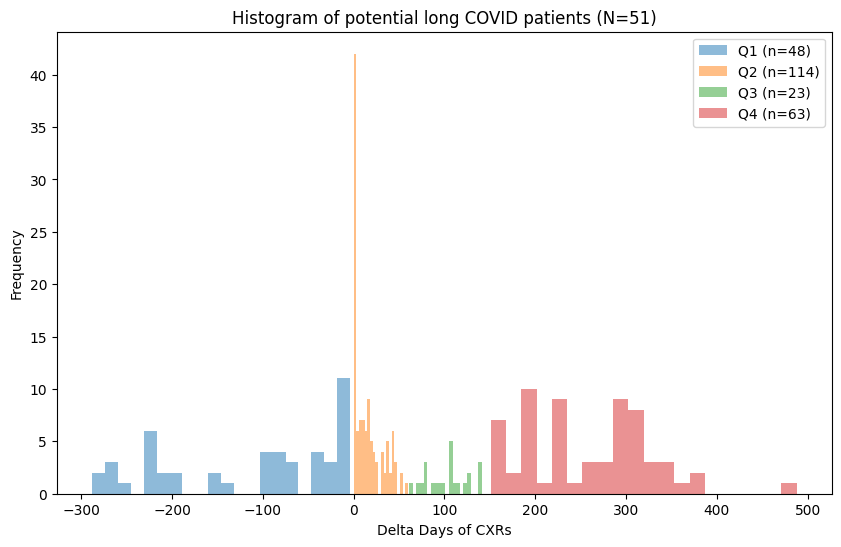

In [45]:
## Plotting the histogram for G2

dir_path = '/home/jagh/Documents/01_UB/MultiOmiX/patientomics/data/05_data_exploration/'
filename = os.path.join(dir_path, 'complete_list_long_covid_patients_Group2.csv')

## Read the CSV file into a DataFrame
df = read_csv(filename)
# print(df.head())

## Set number of patients in the DataFrame
N='51'


#############################################
## Step 1: Plot histogram for CTs and CXRs ##
#############################################

## Extract the delta days from the DataFrame
delta_days = df['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days, exam_type='CTs and CXRs', N=N)



#############################################
## Step 2: Plot histogram for CTs          ##
#############################################

## Filter the patients with 'ris_examination_type' == 'CTA, CTTH'
df_CTs = df[df['ris_examination_type'].isin(['CTA', 'CTTH'])]

## Extract the delta days from the DataFrame 'df_CTs'
delta_days_CTs = df_CTs['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days_CTs, exam_type='CTs', N=N)



#############################################
## Step 3: Plot histogram for CXRs         ##
#############################################

## Filter the patients with 'ris_examination_type' == 'TH'
df_CXRs = df[df['ris_examination_type'].isin(['TH'])]

## Extract the delta days from the DataFrame 'df_CTs'
delta_days_CXRs = df_CXRs['days'].values

## plot the histogram
plot_histogram_by_quartile(delta_days_CXRs, exam_type='CXRs', N=N)

In [40]:
## 469 samples in total for G1 // 469

## 385 samples in total for G2 // 385


## 854 samples in total for G1 and G2 // 854